In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

### Load the integration data

In [2]:
data1 = np.load('data/double_pendulum_order_comparison_1.npz')
data2 = np.load('data/double_pendulum_order_comparison_2.npz')
data4 = np.load('data/double_pendulum_order_comparison_4.npz')
data4limit = np.load('data/double_pendulum_order_comparison_4_limit.npz')

In [31]:
q_list = data2['q_list']
print('System coordinates are {}'.format(q_list))
print(data4limit['t_list'][2] - data4limit['t_list'][1])

System coordinates are ['theta_1' 'theta_2']
0.0025012506253126563


In [4]:
t_list = data2['t_list']

q_1_solutions = data1['q_solutions']
p_1_solutions = data1['p_solutions']

q_2_solutions = data2['q_solutions']
p_2_solutions = data2['p_solutions']

q_4_solutions = data4['q_solutions']
p_4_solutions = data4['p_solutions']

q_4_limit_solutions = data4limit['q_solutions']
p_4_limit_solutions = data4limit['p_solutions']

m1, m2 = data2['ms']
l1, l2 = data2['ls']

## Graph coordinate evolution

In [24]:
def multiple_formatter(denominator=4, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=4, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

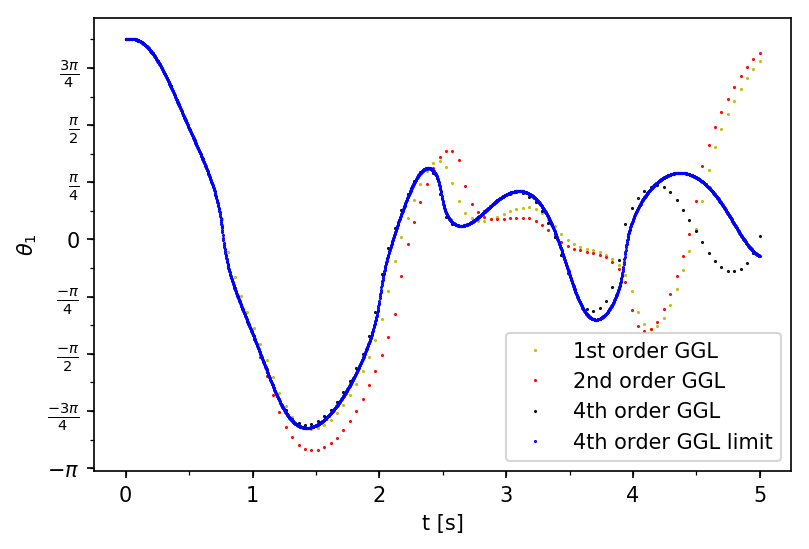

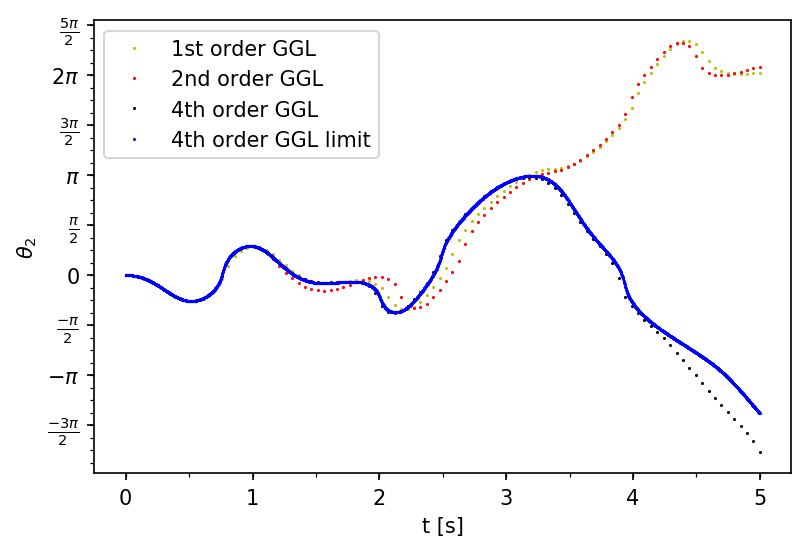

In [27]:
for i in range(0, 2):
    plt.figure(dpi=150)
    
    plt.plot(t_list, [q_1_solutions[j].take(i) for j in range(0, len(q_1_solutions))], 'y.', MarkerSize=1, label="1st order GGL")
    plt.plot(t_list, [q_2_solutions[j].take(i) for j in range(0, len(q_2_solutions))], 'r.', MarkerSize=1, label="2nd order GGL")
    plt.plot(t_list, [q_4_solutions[j].take(i) for j in range(0, len(q_4_solutions))], 'k.', MarkerSize=1, label="4th order GGL")
    plt.plot(data4limit['t_list'], [q_4_limit_solutions[j].take(i) for j in range(0, len(q_4_limit_solutions))], 'b.', MarkerSize=1, label="4th order GGL limit")   

    plt.xlabel('t [s]')
    plt.ylabel("$\\" + q_list[i] + "$")
    plt.legend(loc='best')
    ax = plt.gca()
    
    if i == 0:
        denom = 4
    else:
        denom = 2
    
    ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / denom))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(np.pi / 8))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter(denom)))

## Compute x, y positions of pendulum arms

In [6]:
origin = (0,0)

In [7]:
xs_1 = []
ys_1 = []

xs_2 = []
ys_2 = []

xs_4 = []
ys_4 = []

xs_4limit = []
ys_4limit = []

In [8]:
for index, element in enumerate(q_1_solutions):
    x = np.cumsum([origin[0],
                       l1 * np.sin(element.take(0)),
                       l2 * np.sin(element.take(1))])
    y = np.cumsum([origin[1],
                       -l1 * np.cos(element.take(0)),
                       -l2 * np.cos(element.take(1))])
    xs_1.append(x)
    ys_1.append(y)

In [9]:
for index, element in enumerate(q_2_solutions):
    x = np.cumsum([origin[0],
                       l1 * np.sin(element.take(0)),
                       l2 * np.sin(element.take(1))])
    y = np.cumsum([origin[1],
                       -l1 * np.cos(element.take(0)),
                       -l2 * np.cos(element.take(1))])
    xs_2.append(x)
    ys_2.append(y)

In [10]:
for index, element in enumerate(q_4_solutions):
    x = np.cumsum([origin[0],
                       l1 * np.sin(element.take(0)),
                       l2 * np.sin(element.take(1))])
    y = np.cumsum([origin[1],
                       -l1 * np.cos(element.take(0)),
                       -l2 * np.cos(element.take(1))])
    xs_4.append(x)
    ys_4.append(y)

In [11]:
for index, element in enumerate(q_4_limit_solutions):
    x = np.cumsum([origin[0],
                       l1 * np.sin(element.take(0)),
                       l2 * np.sin(element.take(1))])
    y = np.cumsum([origin[1],
                       -l1 * np.cos(element.take(0)),
                       -l2 * np.cos(element.take(1))])
    xs_4limit.append(x)
    ys_4limit.append(y)

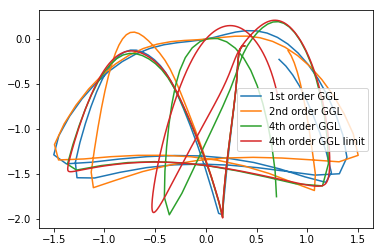

In [12]:
plt.figure()
plt.plot([xs_1[i][2] for i in range(0, len(xs_1))], [ys_1[i][2] for i in range(0, len(ys_1))], MarkerSize=1, label="1st order GGL")
plt.plot([xs_2[i][2] for i in range(0, len(xs_2))], [ys_2[i][2] for i in range(0, len(ys_2))], MarkerSize=1, label="2nd order GGL")
plt.plot([xs_4[i][2] for i in range(0, len(xs_4))], [ys_4[i][2] for i in range(0, len(ys_4))], MarkerSize=1, label="4th order GGL")
plt.plot([xs_4limit[i][2] for i in range(0, len(xs_4limit))], [ys_4limit[i][2] for i in range(0, len(ys_4limit))], MarkerSize=1, label="4th order GGL limit")
plt.legend(loc='best')